# Discrete Fourier Transform

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.fftpack import fft, ifft
from scipy.signal import get_window
import utility_functions as UF

In [2]:
%matplotlib inline

## Set up
Load a sound file to test

Set up a window to filter a sound sample from the file

In [3]:
input_file = '../sms-tools/sounds/piano.wav'
!play '../sms-tools/sounds/piano.wav'


../sms-tools/sounds/piano.wav:

 File Size: 339k      Bit Rate: 706k
  Encoding: Signed PCM    
  Channels: 1 @ 16-bit   
Samplerate: 44100Hz      
Replaygain: off         
  Duration: 00:00:03.85  

In:100%  00:00:03.85 [00:00:00.00] Out:170k  [      |      ] Hd:4.7 Clip:0    
Done.


In [4]:
fs, x = UF.wavread(input_file)
fs # sampling rate per second

44100

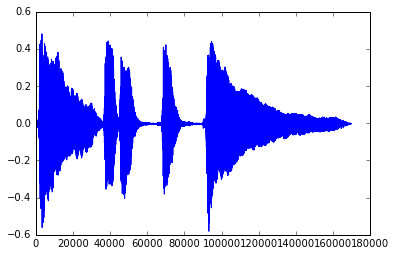

In [5]:
plt.plot(x)

Create a Blackman window to filter a segment of 511 samples

In [6]:
window = 'blackman'
M = 511
w = get_window(window, M)

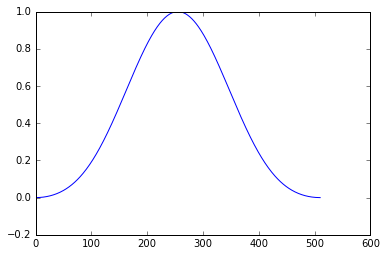

In [7]:
plt.plot(w)

In [8]:
# time in input_file where analysis will begin
time = 0.2
sample = int(time * fs)

Extract a sample and plot

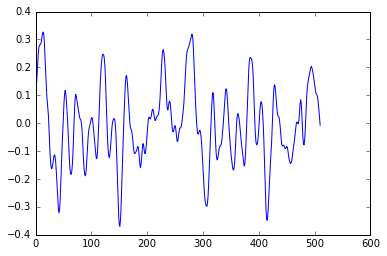

In [9]:
x1 = x[sample:sample + M]
plt.plot(x1)

In [10]:
N = 1024 # fft size-- should be power of 2 >= M
# mX, pX = DFT.dftAnal(x1, 2, N)

# The Discrete Fourier Transform 

Walk through the dft_model

In [11]:
# Size of positive spectrum (inludes sample 0)
hN = (N / 2) + 1

# Half analysis window size by rounding and by flooring
hM1 = int(math.floor((w.size + 1) / 2)) # 256
hM2 = int(math.floor(w.size / 2))       # 255

In [12]:
# Initialize FFT buffer
fft_buffer = np.zeros(N)
# Initialize output array
y = np.zeros(x1.size)

## Begin Analysis

In [13]:
# Window the input sound
xw = x1 * w

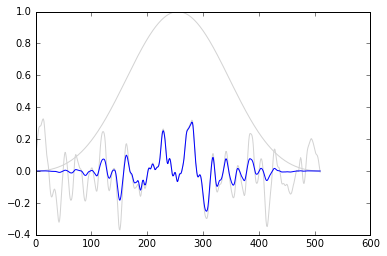

In [14]:
plt.plot(w, color = 'lightgrey')
plt.plot(x1, color = 'lightgrey')
plt.plot(xw)

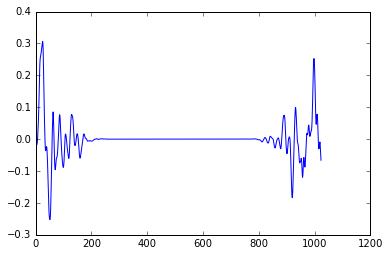

In [15]:
# Zero-phase window in buffer (Split xw in half and swap halves along with any 0-padding)
fft_buffer[:hM1] = xw[hM2:]
fft_buffer[-hM2:] = xw[:hM2]
plt.plot(fft_buffer)

### Do FFT

In [16]:
X = fft(fft_buffer)
X

array([ 0.57736967+0.j        ,  1.35439910+0.06921594j,
        3.21712211+0.18311593j, ...,  5.19358756-0.35967947j,
        3.21712211-0.18311593j,  1.35439910-0.06921594j])

In [17]:
# Compute magnitude of positive side
absX = abs(X[:hN])
# If 0s present add epsilon to prevent log error
absX[absX < np.finfo(float).eps] = np.finfo(float).eps
# And convert to decibels
mX = 20 * np.log10(absX)

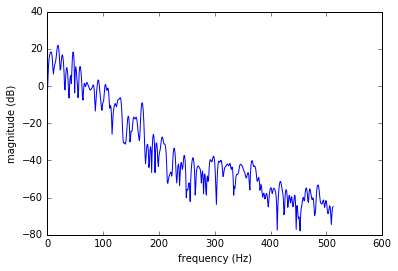

In [18]:
plt.plot(mX)
plt.xlabel('frequency (Hz)')
plt.ylabel('magnitude (dB)')

In [19]:
# Phases
pX = np.unwrap(np.angle(X[:hN]))

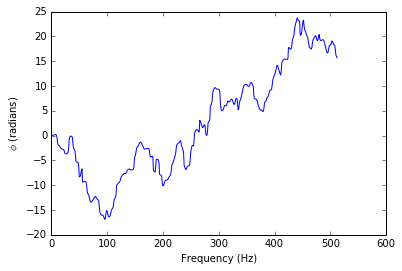

In [20]:
plt.plot(pX)
plt.xlabel('Frequency (Hz)')
plt.ylabel('$\phi$ (radians)')

## Synthesis

In [21]:
# Initialize output spectrum
Y = np.zeros(N, dtype = complex)
# Generate positive frequencies (inverse dB conversion)
Y[:hN] = 10 ** (mX / 20) * np.exp(1j * pX)
# ...and negative frequencies
Y[hN:] = 10 ** (mX[-2:0:-1] / 20) * np.exp(-1j * pX[-2:0:-1])

In [22]:
# Inverse FFT
fft_buffer = np.real(ifft(Y))
# and undo zero-phase windowing
y[:hM2] = fft_buffer[-hM2:]
y[hM2:] = fft_buffer[:hM1]

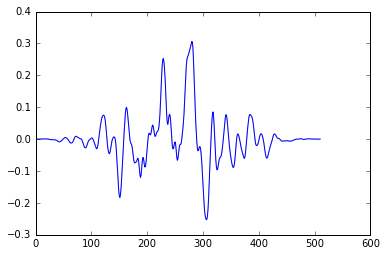

In [23]:
plt.plot(xw, color = 'lightgrey')
plt.plot(y)

NOTE: For this model, synthesis is perfect. Synthesized values (y--in blue) perfectly overlapping original windowed values (xw--in grey--not visible)

### CONTINUE AT: 
Short-time Fourier Transform